In [49]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


### Let's read the data

In [50]:
data = pd.read_csv('../Data/diamonds_train.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


### Correlation

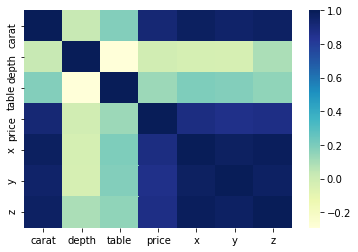

In [51]:
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap='YlGnBu')

In [52]:
# z,y,z is directly proportional to the diamond weight, so we are not going to use this columns

In [79]:
diamonds = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',]]
diamonds.to_csv('../Data/diamonds_data.csv')

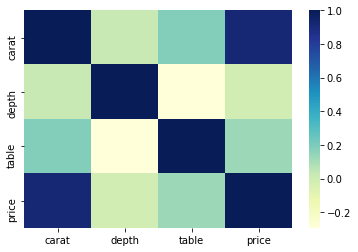

In [80]:
corr = diamonds.corr()
plt.figure()
sns.heatmap(corr, cmap='YlGnBu')

In [81]:
diamonds.describe(include='all')

,carat,cut,color,clarity,depth,table,price
count,40455.000000,40455,40455,40455,40455.000000,40455.000000,40455.000000
unique,NaN,5,7,8,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN
freq,NaN,16220,8455,9749,NaN,NaN,NaN
mean,0.797706,NaN,NaN,NaN,61.752841,57.446133,3928.444469
std,0.475544,NaN,NaN,NaN,1.431725,2.233535,3992.416147
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2397.000000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5331.000000


In [56]:
cut = diamonds['cut'].value_counts()
cut

Ideal        16220
Premium      10260
Very Good     9095
Good          3663
Fair          1217
Name: cut, dtype: int64

In [57]:
color = diamonds['color'].value_counts()
color

G    8455
E    7325
F    7177
H    6277
D    5049
I    4032
J    2140
Name: color, dtype: int64

In [58]:
diamonds.pivot_table(index=['color'], aggfunc='mean')

,carat,depth,price,table
color,,,,
D,0.653036,61.721886,3134.943157,57.344959
E,0.658835,61.659836,3088.342526,57.494567
F,0.731503,61.689954,3677.355720,57.409726
G,0.774382,61.752785,4023.214902,57.287889
H,0.910355,61.827481,4476.469014,57.533503
I,1.026791,61.873214,5090.868800,57.562574
J,1.166500,61.909626,5346.234112,57.790701


In [59]:
diamonds.pivot_table(index=['color'], aggfunc='min')


,carat,clarity,cut,depth,price,table
color,,,,,,
D,0.20,I1,Fair,54.2,357,52.0
E,0.20,I1,Fair,53.3,326,44.0
F,0.22,I1,Fair,52.3,342,50.0
G,0.23,I1,Fair,43.0,354,52.0
H,0.23,I1,Fair,52.7,337,50.0
I,0.23,I1,Fair,55.3,334,43.0
J,0.23,I1,Fair,43.0,335,52.0


In [60]:
diamonds.pivot_table(index=['color'], aggfunc='max')

,carat,clarity,cut,depth,price,table
color,,,,,,
D,3.40,VVS2,Very Good,71.6,18693,73.0
E,3.05,VVS2,Very Good,79.0,18731,73.0
F,3.01,VVS2,Very Good,71.0,18791,95.0
G,3.01,VVS2,Very Good,72.9,18818,76.0
H,4.13,VVS2,Very Good,71.8,18795,73.0
I,4.01,VVS2,Very Good,71.3,18823,70.0
J,4.50,VVS2,Very Good,73.6,18710,68.0


In [61]:
diamonds.pivot_table(index=['color'], aggfunc='median')

,carat,depth,price,table
color,,,,
D,0.53,61.8,1820.0,57.0
E,0.53,61.8,1735.0,57.0
F,0.70,61.8,2312.0,57.0
G,0.70,61.8,2262.0,57.0
H,0.90,61.9,3447.0,57.0
I,1.00,62.0,3709.5,57.0
J,1.12,62.0,4268.5,58.0


In [62]:
diamonds.pivot_table(index=['carat'], aggfunc='max')

,clarity,color,cut,depth,price,table
carat,,,,,,
0.20,VS2,E,Premium,61.7,367,62.0
0.21,VS2,E,Very Good,63.2,394,62.0
0.22,VS2,F,Premium,65.1,470,62.0
0.23,VVS2,J,Very Good,64.5,688,66.0
0.24,VVS2,J,Very Good,65.0,752,65.0
...,...,...,...,...,...,...
3.51,VS2,J,Premium,62.5,18701,59.0
4.00,I1,I,Very Good,63.3,15984,58.0
4.01,I1,J,Premium,62.5,15223,62.0


### Max

In [63]:
diamonds.max()

carat            4.5
cut        Very Good
color              J
clarity         VVS2
depth             79
table             95
price          18823
dtype: object

### Min

In [64]:
diamonds.min()

carat       0.2
cut        Fair
color         D
clarity      I1
depth        43
table        43
price       326
dtype: object

### Mean

In [65]:
diamonds.mean()

carat       0.797706
depth      61.752841
table      57.446133
price    3928.444469
dtype: float64

### Standard deviation

In [66]:
diamonds.std()

carat       0.475544
depth       1.431725
table       2.233535
price    3992.416147
dtype: float64

### Median

In [67]:
data.median()

carat       0.70
depth      61.80
table      57.00
price    2397.00
x           5.69
y           5.71
z           3.52
dtype: float64

### Percentiles

In [68]:
diamonds.quantile(.25)

carat      0.4
depth     61.0
table     56.0
price    945.0
Name: 0.25, dtype: float64

In [69]:
diamonds.quantile(.75)

carat       1.04
depth      62.50
table      59.00
price    5331.00
Name: 0.75, dtype: float64

### Visualization

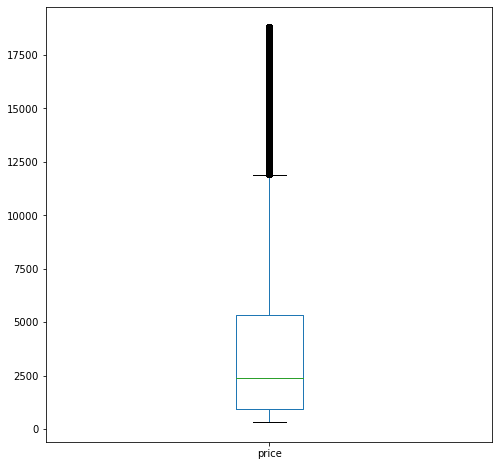

In [70]:
diamonds[['price']].plot(kind='box', figsize=(8, 8))

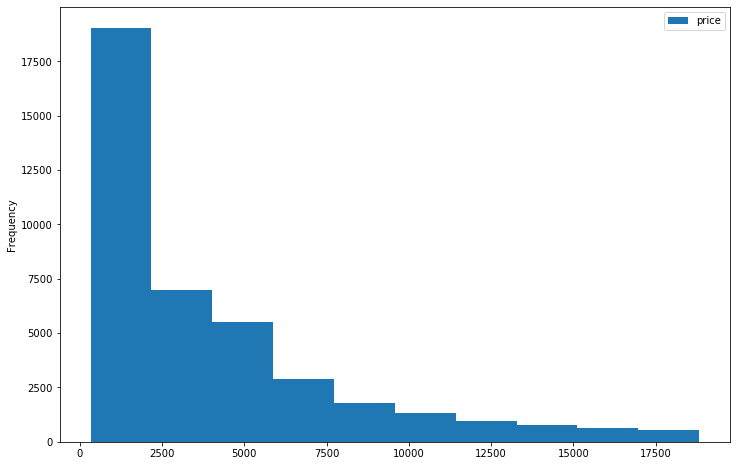

In [71]:
diamonds[['price']].plot(kind='hist', figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

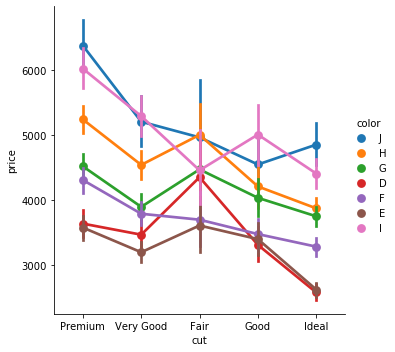

In [92]:
fig = plt.figure(figsize=(12,8))
ax = sns.catplot(x='cut', y='price', hue='color', kind='point', data=diamonds);


<Figure size 864x576 with 0 Axes>

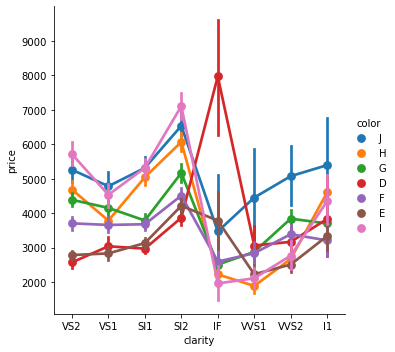

In [93]:
fig = plt.figure(figsize=(12,8))
ax = sns.catplot(x='clarity', y='price', hue='color', kind='point', data=diamonds);

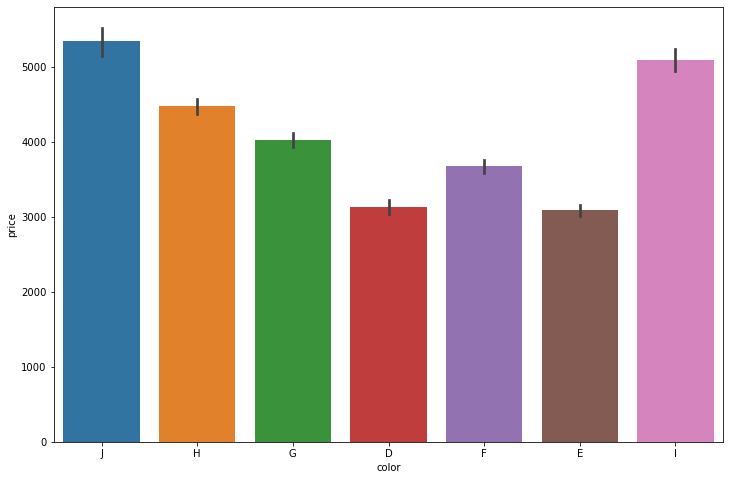

In [74]:
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(x='color', y='price', data=diamonds)


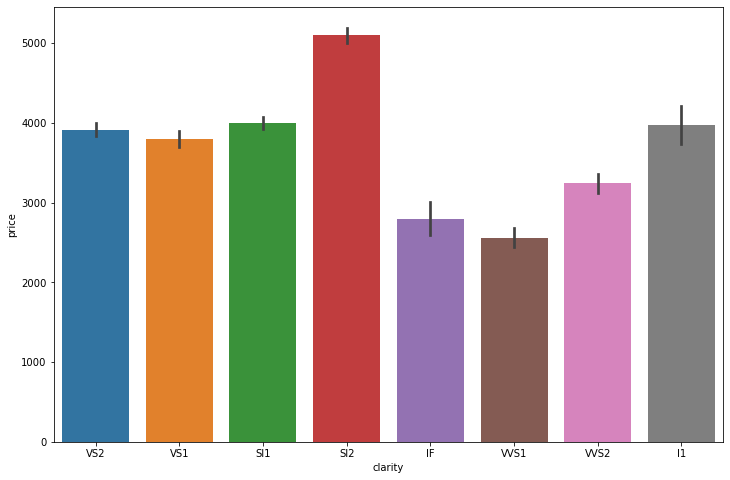

In [75]:
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(x='clarity', y='price', data=diamonds)

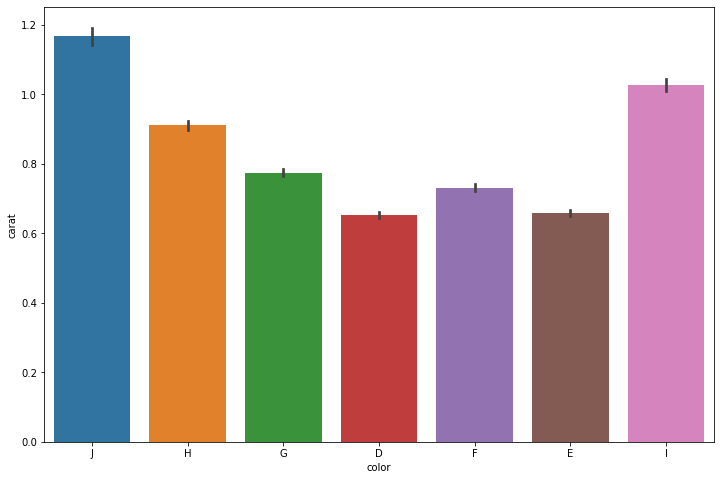

In [76]:
fig = plt.figure(figsize=(12,8))
ax = sns.barplot(x='color', y='carat', data=diamonds)

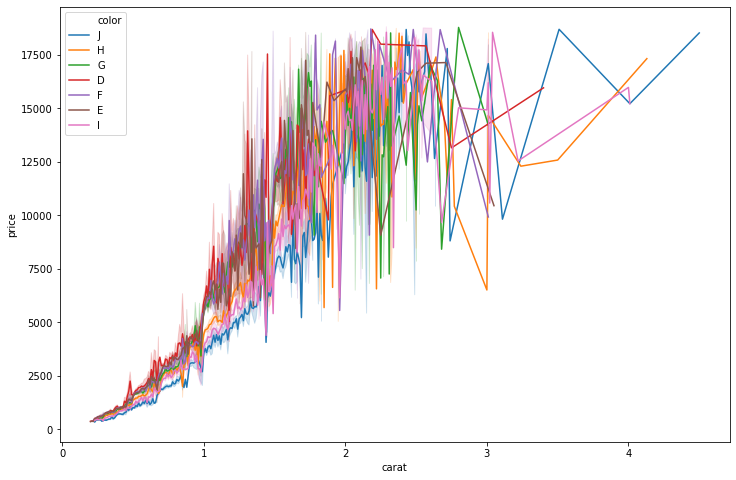

In [77]:
fig = plt.figure(figsize=(12,8))
ax = sns.lineplot(x='carat', y='price', hue='color', data=diamonds)

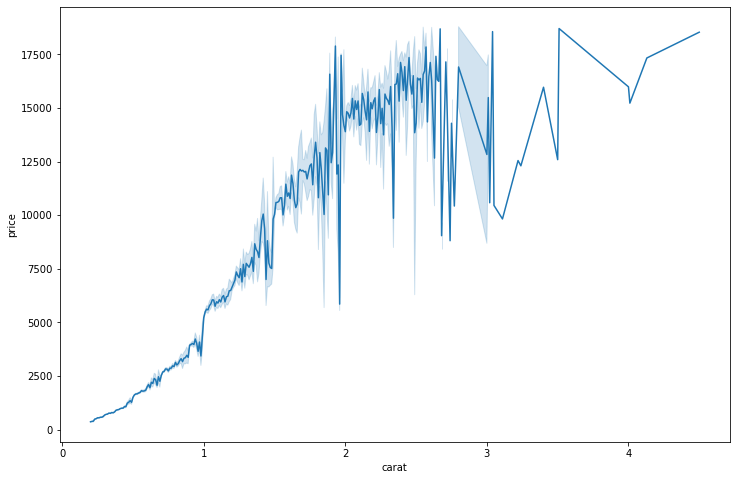

In [78]:
fig = plt.figure(figsize=(12,8))
ax = sns.lineplot(x='carat', y='price', data=diamonds)